 # Project Title :- Telecom Customer Churn Prediction

## importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,precision_score, recall_score
from sklearn.metrics import roc_auc_score,roc_curve
    
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.dark_palette

<function seaborn.palettes.dark_palette(color, n_colors=6, reverse=False, as_cmap=False, input='rgb')>

## Step 1: problem statement

### The dataset includes the following features (Independent variable):

### The target Column (Dependent variable):

## Step 2: Data Gathering

In [3]:
df_tel = pd.read_csv(r"D:\Jupyter python\My Python\Machine Learing Project\data.csv")
df_tel.head(10)

Id State  Account length  Area code International plan  \
0   CUST-1    KS             128        415                 No   
1   CUST-2    OH             107        415                 No   
2   CUST-3    NJ             137        415                 No   
3   CUST-4    OH              84        408                Yes   
4   CUST-5    OK              75        415                Yes   
5   CUST-6    AL             118        510                Yes   
6   CUST-7    MA             121        510                 No   
7   CUST-8    MO             147        415                Yes   
8   CUST-9    LA             117        408                 No   
9  CUST-10    WV             141        415                Yes   

  Voice mail plan  Number vmail messages  Total day minutes  Total day calls  \
0             Yes                     25              265.1              110   
1             Yes                     26              161.6              123   
2              No                      0              243.4              114   
3              No                      0              299.4               71   
4              No                      0              166.7              113   
5              No                      0              223.4               98   
6             Yes                     24              218.2               88   
7              No                      0              157.0               79   
8              No                      0              184.5               97   
9             Yes                     37              258.6               84   

   Total day charge  ...  Total eve calls  Total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   
5             37.98  ...              101             18.75   
6             37.09  ...              108             29.62   
7             26.69  ...               94              8.76   
8             31.37  ...               80             29.89   
9             43.96  ...              111             18.87   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0  False  
6                       3  False  
7                       0  

## Step 3: EDA 

In [3]:
df_tel.shape

(3333, 21)

In [4]:
df_tel.info() # Checking for data types and info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      3333 non-null   object 
 1   State                   3333 non-null   object 
 2   Account length          3333 non-null   int64  
 3   Area code               3333 non-null   int64  
 4   International plan      3333 non-null   object 
 5   Voice mail plan         3333 non-null   object 
 6   Number vmail messages   3333 non-null   int64  
 7   Total day minutes       3333 non-null   float64
 8   Total day calls         3333 non-null   int64  
 9   Total day charge        3333 non-null   float64
 10  Total eve minutes       3333 non-null   float64
 11  Total eve calls         3333 non-null   int64  
 12  Total eve charge        3333 non-null   float64
 13  Total night minutes     3333 non-null   float64
 14  Total night calls       3333 non-null   

In [5]:
df_tel.isna().sum()  # Checking for null values

Id                        0
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [6]:
df_tel.describe() # Checking for statistical value

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [7]:
df_tel.drop("Id",axis = 1,inplace=True) # drop ID column 

### To find ouliers

<Axes: >

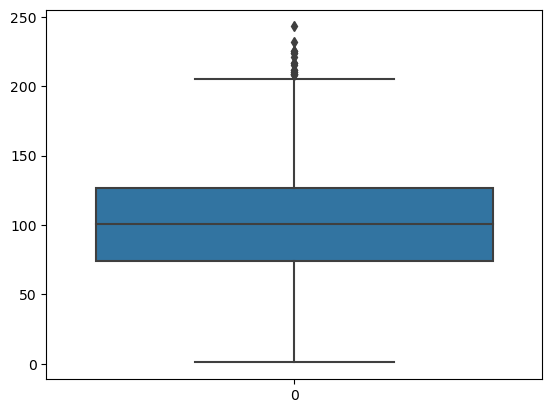

In [8]:
# Finding ouliers by boxplot
sns.boxplot(df_tel["Account length"]) 

In [9]:
df_tel2 = df_tel.drop("Churn",axis=1) # Drop target column for Finding ouliers function
                                      # Also these data frame Carrying ouliers

In [10]:
# Finding ouliers by function

Q1 = df_tel2.quantile(0.25)
Q3 = df_tel2.quantile(0.75) 
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

ouliers = (df_tel2 < lower_tail) | (df_tel2 > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)


Account length             18
Area code                   0
Customer service calls    267
International plan          0
Number vmail messages       1
State                       0
Total day calls            23
Total day charge           25
Total day minutes          25
Total eve calls            20
Total eve charge           24
Total eve minutes          24
Total intl calls           78
Total intl charge          49
Total intl minutes         46
Total night calls          22
Total night charge         30
Total night minutes        30
Voice mail plan             0
dtype: int64


In [11]:
df_tel["Customer service calls"].unique() 

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8], dtype=int64)

### To replace outliers

In [12]:
def Finding_outliar1(df_tel,columns):
    for column in columns:
            q1 = df_tel[column].quantile(0.25)
            q3 = df_tel[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df_tel[column] = df_tel[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["Account length","Number vmail messages","Total day calls","Total day charge","Total day minutes","Total eve calls",
           "Total eve charge","Total eve minutes","Total intl calls","Total intl charge","Total intl minutes","Total night calls",          
           "Total night charge","Total night minutes" ]
Finding_outliar1(df_tel,columns)

-5.5
206.5
-30.0
50.0
46.5
154.5
5.890000000000001
55.33
34.64999999999996
325.45000000000005
46.5
154.5
5.4
28.759999999999998
63.54999999999997
338.35
-1.5
10.5
0.8449999999999995
4.7250000000000005
3.1000000000000005
17.5
48.0
152.0
2.914999999999999
15.195
64.54999999999998
337.75


## Step 4 : Feature Engineering

### Changing data types of objects column

In [13]:
df_tel["State"].unique() 

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [14]:
df_tel = pd.get_dummies(df_tel,columns = ["State"])  # OneHot Encoding
df_tel.head()    

Account length  Area code International plan Voice mail plan  \
0           128.0        415                 No             Yes   
1           107.0        415                 No             Yes   
2           137.0        415                 No              No   
3            84.0        408                Yes              No   
4            75.0        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                   25.0              265.1            110.0   
1                   26.0              161.6            123.0   
2                    0.0              243.4            114.0   
3                    0.0              299.4             71.0   
4                    0.0              166.7            113.0   

   Total day charge  Total eve minutes  Total eve calls  ...  State_SD  \
0             45.07             197.40             99.0  ...         0   
1             27.47             195.50            103.0  ...         0   
2             41.38             121.20            110.0  ...         0   
3             50.90              63.55             88.0  ...         0   
4             28.34             148.30            122.0  ...         0   

   State_TN  State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_WV  State_WY  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 70 columns]

In [15]:
df_tel["International plan"].unique() 

array(['No', 'Yes'], dtype=object)

In [16]:
df_tel["International plan"]=df_tel["International plan"].replace({"Yes":1, "No":0})  # labelEncoding on International plan

In [17]:
df_tel["Voice mail plan"].unique() 

array(['Yes', 'No'], dtype=object)

In [18]:
df_tel["Voice mail plan"]=df_tel["Voice mail plan"].replace({"Yes":1, "No":0})  # labelEncoding on Voice mail plan

In [19]:
df_tel["Area code"].unique()

array([415, 408, 510], dtype=int64)

In [20]:
df_tel["Area code"]=df_tel["Area code"].replace({415:0,408:1,510:3}) # replacing values of Area code

In [21]:
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   float64
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   float64
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   float64
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   float64
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   float64
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

### For df_tel2 Dataframe

In [22]:
df_tel2 = pd.get_dummies(df_tel2,columns = ["State"])  # OneHot Encoding  

In [23]:
df_tel2["International plan"]=df_tel2["International plan"].replace({"Yes":1, "No":0})  # labelEncoding on International plan

In [24]:
df_tel2["Voice mail plan"]=df_tel2["Voice mail plan"].replace({"Yes":1, "No":0})  # labelEncoding on Voice mail plan

In [25]:
df_tel2["Area code"]=df_tel2["Area code"].replace({415:0,408:1,510:3}) # replacing values of Area code

In [26]:
df_tel2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

<Axes: xlabel='Churn', ylabel='count'>

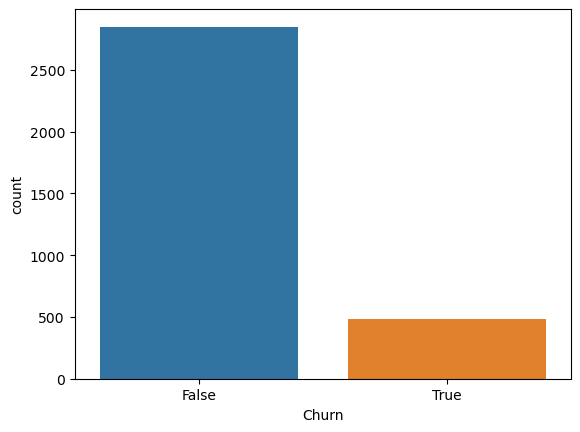

In [27]:
sns.countplot(x=df_tel["Churn"])  # Data in target column is imbalance

## Step 5 : Feature Selection

### Assumption 1.Linearity 

In [28]:
#pearson's coeff of correalation R = -1 to +1
df_tel.corr()

Account length  Area code  International plan  \
Account length               1.000000  -0.009318            0.024906   
Area code                   -0.009318   1.000000            0.042645   
International plan           0.024906   0.042645            1.000000   
Voice mail plan              0.003586  -0.008703            0.006006   
Number vmail messages       -0.004007  -0.010035            0.008753   
...                               ...        ...                 ...   
State_VT                     0.012916   0.005770           -0.007445   
State_WA                     0.003791   0.013176           -0.017442   
State_WI                    -0.008274   0.010379            0.002959   
State_WV                    -0.025465   0.021194           -0.018913   
State_WY                     0.017017  -0.005825            0.017134   

                       Voice mail plan  Number vmail messages  \
Account length                0.003586              -0.004007   
Area code                    -0.008703              -0.010035   
International plan            0.006006               0.008753   
Voice mail plan               1.000000               0.956956   
Number vmail messages         0.956956               1.000000   
...                                ...                    ...   
State_VT                     -0.019218              -0.016957   
State_WA                     -0.039753              -0.036746   
State_WI                      0.006313               0.002074   
State_WV                     -0.001233               0.008313   
State_WY                     -0.014735              -0.017746   

                       Total day minutes  Total day calls  Total day charge  \
Account length                  0.007016         0.038608          0.007014   
Area code                      -0.020783        -0.009149         -0.020785   
International plan              0.049078         0.003474          0.049080   
Voice mail plan                -0.001364        -0.011757         -0.001366   
Number vmail messages           0.000998        -0.010258          0.000995   
...                                  ...              ...               ...   
State_VT                        0.007435         0.003708          0.007441   
State_WA                       -0.002819         0.005177         -0.002820   
State_WI                       -0.001010        -0.029572         -0.001017   
State_WV                       -0.019633         0.030458         -0.019630   
State_WY                        0.001328         0.013327          0.001320   

                       Total eve minutes  Total eve calls  ...  State_SD  \
Account length                 -0.006579         0.018693  ...  0.014221   
Area code                       0.005010        -0.017586  ...  0.006531   
International plan              0.018323         0.005605  ... -0.006214   
Voice mail plan                 0.021118        -0.007288  ...  0.022208   
Number vmail messages           0.017163        -0.006833  ...  0.023097   
...                                  ...              ...  ...       ...   
State_VT                        0.012944        -0.018655  ... -0.020261   
State_WA                        0.008355        -0.031596  ... -0.019244   
State_WI                       -0.010907        -0.005622  ... -0.020959   
State_WV                       -0.045302        -0.018237  ... -0.024539   
State_WY                        0.014846        -0.007008  ... -0.020821   

                       State_TN  State_TX  State_UT  State_VA  State_VT  \
Account length        -0.026574 -0.013601 -0.002069  0.018957  0.012916   
Area code             -0.012509 -0.012686  0.014234 -0.002569  0.005770   
International plan     0.007003 -0.006819 -0.006819  0.010383 -0.007445   
Voice mail plan       -0.003545 -0.018072  0.000382 -0.014735 -0.019218   
Number vmail messages -0.009855 -0.017961  0.004357 -0.011908 -0.016957   
...                         ...       ...       ...       ...    

In [29]:
plt.figure(figsize=(100,100))
sns.heatmap(df_tel.corr(),annot= True)

<Axes: >

<Axes: >

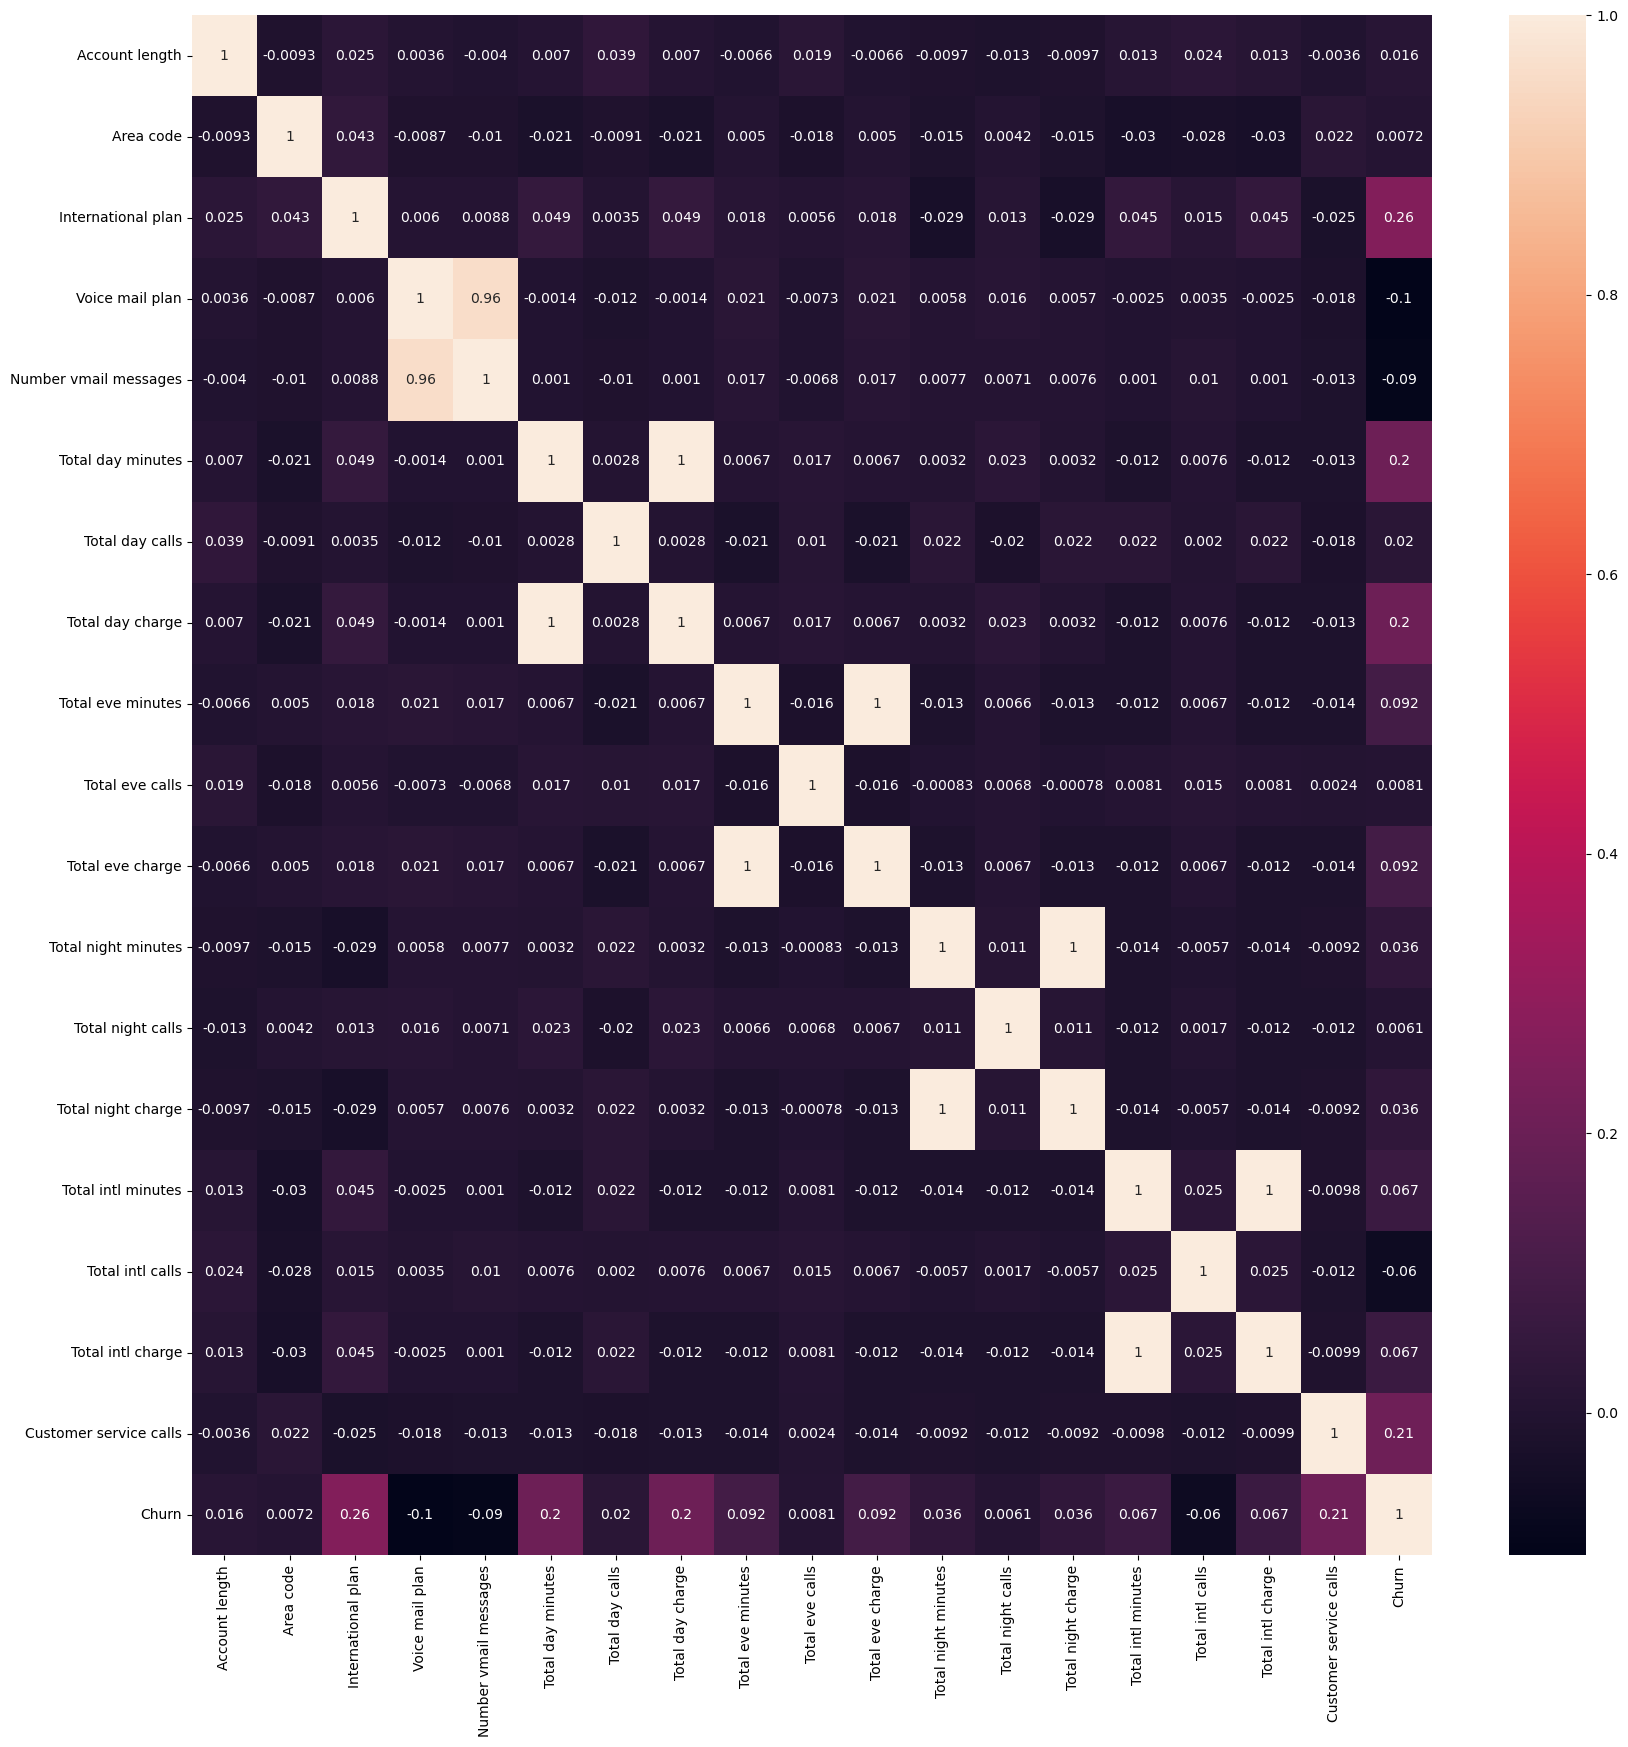

In [30]:
new_heap_map = df_tel.iloc[:,:19].corr()
plt.figure(figsize=(20,20))
sns.heatmap(new_heap_map,annot= True)  # Filtering column name by using ILOC function for better result

### Assumption 2.No multicolinearity

In [31]:
df3 = df_tel.drop(["Churn"],axis =1) 
df3.head()

Account length  Area code  International plan  Voice mail plan  \
0           128.0          0                   0                1   
1           107.0          0                   0                1   
2           137.0          0                   0                0   
3            84.0          1                   1                0   
4            75.0          0                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                   25.0              265.1            110.0   
1                   26.0              161.6            123.0   
2                    0.0              243.4            114.0   
3                    0.0              299.4             71.0   
4                    0.0              166.7            113.0   

   Total day charge  Total eve minutes  Total eve calls  ...  State_SD  \
0             45.07             197.40             99.0  ...         0   
1             27.47             195.50            103.0  ...         0   
2             41.38             121.20            110.0  ...         0   
3             50.90              63.55             88.0  ...         0   
4             28.34             148.30            122.0  ...         0   

   State_TN  State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_WV  State_WY  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 69 columns]

In [32]:
df_VIF = pd.DataFrame()
df_VIF['Columns'] = df3.columns
df_VIF

Columns
0          Account length
1               Area code
2      International plan
3         Voice mail plan
4   Number vmail messages
..                    ...
64               State_VT
65               State_WA
66               State_WI
67               State_WV
68               State_WY

[69 rows x 1 columns]

In [33]:
vif = []
for i in range(df3.shape[1]):
    vif_cal = variance_inflation_factor(df3.to_numpy(),i)
    vif.append(vif_cal)

In [34]:
df_VIF["VIF"]= vif
df_VIF 

Columns        VIF
0          Account length   1.015926
1               Area code   1.018265
2      International plan   1.029488
3         Voice mail plan  12.091230
4   Number vmail messages  12.080279
..                    ...        ...
64               State_VT   4.348302
65               State_WA   3.952925
66               State_WI   4.395522
67               State_WV   5.696189
68               State_WY   4.552247

[69 rows x 2 columns]

## SMOTE To Balance Data

### Remaining programme status pending

### Function for Conclusion

In [35]:
result = []
   
def Final_result(model_name, acc_score,precision,recall):
      if model_name not in result:
            result.append([model_name, (acc_score*100),precision,recall])
            final_df = pd.DataFrame(result, columns=['Model Name', 'Accuracy Score (%)','Precision', 'Recall'])
            return final_df

### train_test_split

In [36]:
x = df_tel.drop("Churn",axis=1)
y = df_tel["Churn"]

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)

# 1.Logistic Regression

## Step 6 : model training

In [38]:
log_reg = LogisticRegression()  

In [39]:
log_reg_model = log_reg.fit(xtrain,ytrain)

In [40]:
ytrain_pre_log = log_reg_model.predict(xtrain)
ytrain_pre_log

array([False, False, False, ..., False, False, False])

## Step 7 : Model Evaluation

### Training

In [41]:
accuracy_training = accuracy_score(ytrain,ytrain_pre_log)
print(f"Accuracy : {accuracy_training}")
 
Training_confusion_matrix = confusion_matrix(ytrain,ytrain_pre_log)
print(Training_confusion_matrix)
 

class_report_training = classification_report(ytrain,ytrain_pre_log)
print(class_report_training)

Accuracy : 0.853836262323189
[[1967   28]
 [ 313   25]]
              precision    recall  f1-score   support

       False       0.86      0.99      0.92      1995
        True       0.47      0.07      0.13       338

    accuracy                           0.85      2333
   macro avg       0.67      0.53      0.52      2333
weighted avg       0.81      0.85      0.81      2333



In [42]:
precision = precision_score(ytrain,ytrain_pre_log)
recall = recall_score(ytrain,ytrain_pre_log)
Final_result("Logistic Reg. Training", accuracy_training, precision, recall)

Model Name  Accuracy Score (%)  Precision    Recall
0  Logistic Reg. Training           85.383626   0.471698  0.073964

### Testing

In [43]:
ytest_pre_log = log_reg_model.predict(xtest)

In [44]:
accuracy_testing = accuracy_score(ytest,ytest_pre_log)
print(f"Accuracy : {accuracy_testing}")
 
Testing_confusion_matrix = confusion_matrix(ytest,ytest_pre_log)
print(Testing_confusion_matrix)
 

class_report_testing = classification_report(ytest,ytest_pre_log)
print(class_report_testing)

Accuracy : 0.85
[[843  12]
 [138   7]]
              precision    recall  f1-score   support

       False       0.86      0.99      0.92       855
        True       0.37      0.05      0.09       145

    accuracy                           0.85      1000
   macro avg       0.61      0.52      0.50      1000
weighted avg       0.79      0.85      0.80      1000



In [45]:
precision = precision_score(ytest,ytest_pre_log)
recall = recall_score(ytest,ytest_pre_log)
Final_result("Logistic Reg. Testing", accuracy_testing, precision, recall)

Model Name  Accuracy Score (%)  Precision    Recall
0  Logistic Reg. Training           85.383626   0.471698  0.073964
1   Logistic Reg. Testing           85.000000   0.368421  0.048276

## Scaling 

### Method:- Normalization

In [46]:
noraml = MinMaxScaler() 
noraml_Sc = noraml.fit_transform(df3)

df_Normal = pd.DataFrame(noraml_Sc,columns=df3.columns)
df_Normal.head()

Account length  Area code  International plan  Voice mail plan  \
0        0.618005   0.000000                 0.0              1.0   
1        0.515815   0.000000                 0.0              1.0   
2        0.661800   0.000000                 0.0              0.0   
3        0.403893   0.333333                 1.0              0.0   
4        0.360097   0.000000                 1.0              0.0   

   Number vmail messages  Total day minutes  Total day calls  \
0                   0.50           0.792469         0.587963   
1                   0.52           0.436554         0.708333   
2                   0.00           0.717847         0.625000   
3                   0.00           0.910420         0.226852   
4                   0.00           0.454092         0.615741   

   Total day charge  Total eve minutes  Total eve calls  ...  State_SD  \
0          0.792476           0.487082         0.486111  ...       0.0   
1          0.436489           0.480167         0.523148  ...       0.0   
2          0.717840           0.209789         0.587963  ...       0.0   
3          0.910396           0.000000         0.384259  ...       0.0   
4          0.454086           0.308406         0.699074  ...       0.0   

   State_TN  State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   State_WV  State_WY  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  

[5 rows x 69 columns]

In [47]:
x_normal = df_Normal
y_normal = df_tel["Churn"]

In [48]:
Nxtrain,Nxtest,Nytrain,Nytest=train_test_split(x_normal,y_normal,test_size=0.3,random_state=10,stratify=y)

In [49]:
log_reg_n= LogisticRegression()
log_normal_model = log_reg_n.fit(Nxtrain,Nytrain)
ytrain_pre_nor = log_normal_model.predict(Nxtrain)
ytest_pre_nor = log_reg_model.predict(Nxtest)

### Training

In [50]:
accuracy_nor = accuracy_score(Nytrain,ytrain_pre_nor)
print(f"Accuracy : {accuracy_nor}")
 
Training_confusion_matrix_nor = confusion_matrix(Nytrain,ytrain_pre_nor)
print(Training_confusion_matrix_nor)
 

class_report_nor = classification_report(Nytrain,ytrain_pre_nor)
print(class_report_nor)

Accuracy : 0.8692670381483069
[[1954   41]
 [ 264   74]]
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      1995
        True       0.64      0.22      0.33       338

    accuracy                           0.87      2333
   macro avg       0.76      0.60      0.63      2333
weighted avg       0.85      0.87      0.84      2333



### Testing

In [51]:
test_accuracy_nor = accuracy_score(Nytest,ytest_pre_nor)
print(f"Accuracy : {test_accuracy_nor}")
 
Testing_confusion_matrix_nor = confusion_matrix(Nytest,ytest_pre_nor)
print(Testing_confusion_matrix_nor)
 

class_report_nor = classification_report(Nytest,ytest_pre_nor)
print(class_report_nor)

Accuracy : 0.702
[[614 241]
 [ 57  88]]
              precision    recall  f1-score   support

       False       0.92      0.72      0.80       855
        True       0.27      0.61      0.37       145

    accuracy                           0.70      1000
   macro avg       0.59      0.66      0.59      1000
weighted avg       0.82      0.70      0.74      1000



## ROC and AUC Curve  

In [52]:
y_pred_roc = log_reg_model.predict_proba(xtrain)
y_pred_roc[:5,:]

array([[0.88837842, 0.11162158],
       [0.95703554, 0.04296446],
       [0.8103261 , 0.1896739 ],
       [0.82963056, 0.17036944],
       [0.96644163, 0.03355837]])

In [53]:
fpr, tpr, threshold = roc_curve(ytrain,y_pred_roc[:,1] )

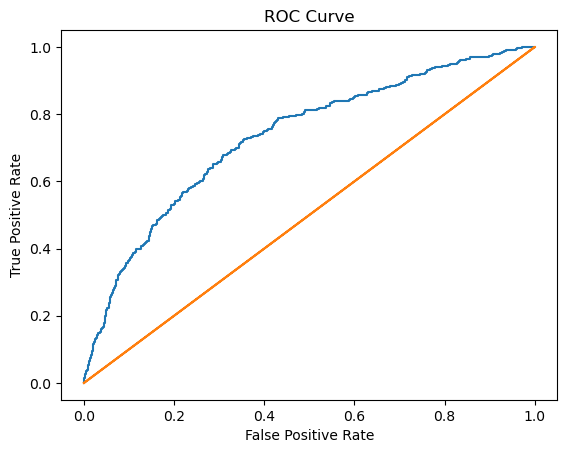

In [54]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.savefig('ROC_Curve.png')
plt.plot(ytrain,ytrain)

# 2.Decision Tree 

In [55]:
x1 = df_tel2
y1 = df_tel["Churn"]
y1

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool

### train_test_split

In [56]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.3,random_state=10,stratify=y)

### Model training

In [57]:
dec_tree = DecisionTreeClassifier()
dec_tree_model = dec_tree.fit(x1train,y1train)
dec_tree_model

DecisionTreeClassifier()

### Training

In [58]:
y1train_pred = dec_tree_model.predict(x1train)
y1train_pred

array([False, False, False, ..., False, False, False])

In [59]:
accuracy_training = accuracy_score(y1train,y1train_pred)
print(f"Accuracy = {accuracy_training}")

Training_classification_report = classification_report(y1train,y1train_pred)
print(f"classification_report = {Training_classification_report}")

Training_confusion_matrix = confusion_matrix(y1train,y1train_pred)
print(f"confusion_matrix = {Training_confusion_matrix}")

Accuracy = 1.0
classification_report =               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1995
        True       1.00      1.00      1.00       338

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

confusion_matrix = [[1995    0]
 [   0  338]]


In [60]:
precision = precision_score(y1train,y1train_pred)
recall = recall_score(y1train,y1train_pred)
Final_result("Decision Tree Training", accuracy_training, precision, recall)

Model Name  Accuracy Score (%)  Precision    Recall
0  Logistic Reg. Training           85.383626   0.471698  0.073964
1   Logistic Reg. Testing           85.000000   0.368421  0.048276
2  Decision Tree Training          100.000000   1.000000  1.000000

### Testing

In [61]:
y1test_pred = dec_tree_model.predict(x1test)

In [62]:
accuracy_testing = accuracy_score(y1test,y1test_pred)
print(f"Accuracy = {accuracy_testing}")

Testing_classification_report = classification_report(y1test,y1test_pred)
print(f"classification_report = {Testing_classification_report}")

Testing_confusion_matrix = confusion_matrix(y1test,y1test_pred)
print(f"confusion_matrix = {Testing_confusion_matrix}")

Accuracy = 0.911
classification_report =               precision    recall  f1-score   support

       False       0.95      0.95      0.95       855
        True       0.69      0.69      0.69       145

    accuracy                           0.91      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000

confusion_matrix = [[811  44]
 [ 45 100]]


In [63]:
precision = precision_score(y1test,y1test_pred)
recall = recall_score(y1test,y1test_pred)
Final_result("Decision Tree Testing", accuracy_testing, precision, recall)

Model Name  Accuracy Score (%)  Precision    Recall
0  Logistic Reg. Training           85.383626   0.471698  0.073964
1   Logistic Reg. Testing           85.000000   0.368421  0.048276
2  Decision Tree Training          100.000000   1.000000  1.000000
3   Decision Tree Testing           91.100000   0.694444  0.689655

In [64]:
plt.figure(figsize=(200,160))
Decision_Tree = plot_tree(dec_tree_model,class_names=["Yes","No"],filled=True)

## Decision Tree Hyperparameter Tunning

In [67]:
Hyper_Decision = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(2,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,20),
} 

In [68]:
Random_search = (dec_tree_model,Hyper_Decision,cv=5)

In [69]:
Random_search.fit(x1train,y1train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [70]:
Random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4)

In [71]:
Decision_hyper_model = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,min_samples_split=16)

In [72]:
Decision_hyper_model.fit(x1train,y1train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=16)

In [122]:
y1train_pred_hyper = Decision_hyper_model.predict(x1train)
y1train_pred_hyper

array([False, False, False, ..., False, False, False])

### Training

In [74]:
accuracy_Training_hyper = accuracy_score(y1train,y1train_pred_hyper)
print(f"Accuracy = {accuracy_Training_hyper}")

Training_classification_report_hyper = classification_report(y1train,y1train_pred_hyper)
print(f"classification_report = {Training_classification_report_hyper}")

Training_confusion_matrix_hyper = confusion_matrix(y1train,y1train_pred_hyper)
print(f"confusion_matrix = {Training_confusion_matrix_hyper}")

Accuracy = 0.9674239177025289
classification_report =               precision    recall  f1-score   support

       False       0.97      0.99      0.98      1995
        True       0.96      0.81      0.88       338

    accuracy                           0.97      2333
   macro avg       0.96      0.90      0.93      2333
weighted avg       0.97      0.97      0.97      2333

confusion_matrix = [[1983   12]
 [  64  274]]


In [75]:
precision = precision_score(y1train,y1train_pred_hyper)
recall = recall_score(y1train,y1train_pred_hyper)
Final_result("Decision Tree(with Hyperparameters)Training", accuracy_Training_hyper, precision, recall)

Model Name  Accuracy Score (%)  Precision  \
0                       Logistic Reg. Training           85.383626   0.471698   
1                        Logistic Reg. Testing           85.000000   0.368421   
2                       Decision Tree Training          100.000000   1.000000   
3                        Decision Tree Testing           91.100000   0.694444   
4  Decision Tree(with Hyperparameters)Training           96.742392   0.958042   

     Recall  
0  0.073964  
1  0.048276  
2  1.000000  
3  0.689655  
4  0.810651

### Testing

In [76]:
y1test_pred_hyper = Decision_hyper_model.predict(x1test)

In [77]:
accuracy_Testing_hyper = accuracy_score(y1test,y1test_pred_hyper)
print(f"Accuracy = {accuracy_Testing_hyper}")

Testing_classification_hyper = classification_report(y1test,y1test_pred_hyper)
print(f"classification_report = {Testing_classification_hyper}")

Testing_confusion__hyper = confusion_matrix(y1test,y1test_pred_hyper)
print(f"confusion_matrix = {Testing_confusion__hyper}")

Accuracy = 0.94
classification_report =               precision    recall  f1-score   support

       False       0.95      0.98      0.97       855
        True       0.88      0.68      0.77       145

    accuracy                           0.94      1000
   macro avg       0.91      0.83      0.87      1000
weighted avg       0.94      0.94      0.94      1000

confusion_matrix = [[841  14]
 [ 46  99]]


In [78]:
precision = precision_score(y1test,y1test_pred_hyper)
recall = recall_score(y1test,y1test_pred_hyper)
Final_result("Decision Tree(with Hyperparameters)Testing",accuracy_Testing_hyper,precision, recall)

Model Name  Accuracy Score (%)  Precision  \
0                       Logistic Reg. Training           85.383626   0.471698   
1                        Logistic Reg. Testing           85.000000   0.368421   
2                       Decision Tree Training          100.000000   1.000000   
3                        Decision Tree Testing           91.100000   0.694444   
4  Decision Tree(with Hyperparameters)Training           96.742392   0.958042   
5   Decision Tree(with Hyperparameters)Testing           94.000000   0.876106   

     Recall  
0  0.073964  
1  0.048276  
2  1.000000  
3  0.689655  
4  0.810651  
5  0.682759

# Ensemble Methods:- Begging and Boosting

# 3.Random Forest  (Begging)

In [79]:
Random_tel=RandomForestClassifier()
Random_tel

RandomForestClassifier()

In [80]:
Random_tel_cls = Random_tel.fit(x1train,y1train)
Random_tel_cls

RandomForestClassifier()

In [81]:
y1train_pred_forest = Random_tel_cls.predict(x1train)
y1train_pred_forest

array([False, False, False, ..., False, False, False])

### Training

In [82]:
Random_accuracy = accuracy_score(y1train,y1train_pred_forest)
print(f"Accuracy = {Random_accuracy}")

Random_Training_classification = classification_report(y1train,y1train_pred_forest)
print(f"classification_report = {Random_Training_classification}")

Random_Training_confusion = confusion_matrix(y1train,y1train_pred_forest)
print(f"confusion_matrix = {Random_Training_confusion}")

Accuracy = 1.0
classification_report =               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1995
        True       1.00      1.00      1.00       338

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

confusion_matrix = [[1995    0]
 [   0  338]]


In [83]:
precision = precision_score(y1train,y1train_pred_forest)
recall = recall_score(y1train,y1train_pred_forest)
Final_result("Random Forest Training", Random_accuracy, precision, recall)

Model Name  Accuracy Score (%)  Precision  \
0                       Logistic Reg. Training           85.383626   0.471698   
1                        Logistic Reg. Testing           85.000000   0.368421   
2                       Decision Tree Training          100.000000   1.000000   
3                        Decision Tree Testing           91.100000   0.694444   
4  Decision Tree(with Hyperparameters)Training           96.742392   0.958042   
5   Decision Tree(with Hyperparameters)Testing           94.000000   0.876106   
6                       Random Forest Training          100.000000   1.000000   

     Recall  
0  0.073964  
1  0.048276  
2  1.000000  
3  0.689655  
4  0.810651  
5  0.682759  
6  1.000000

### Testing

In [84]:
y1test_pred_forest = Random_tel_cls.predict(x1test)

In [85]:
Random_Testing_accuracy = accuracy_score(y1test,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(y1test,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(y1test,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.935
classification_report =               precision    recall  f1-score   support

       False       0.93      1.00      0.96       855
        True       0.99      0.56      0.71       145

    accuracy                           0.94      1000
   macro avg       0.96      0.78      0.84      1000
weighted avg       0.94      0.94      0.93      1000

confusion_matrix = [[854   1]
 [ 64  81]]


In [86]:
precision = precision_score(y1test,y1test_pred_forest)
recall = recall_score(y1test,y1test_pred_forest)
Final_result("Random Forest Testing",Random_Testing_accuracy,precision, recall)

Model Name  Accuracy Score (%)  Precision  \
0                       Logistic Reg. Training           85.383626   0.471698   
1                        Logistic Reg. Testing           85.000000   0.368421   
2                       Decision Tree Training          100.000000   1.000000   
3                        Decision Tree Testing           91.100000   0.694444   
4  Decision Tree(with Hyperparameters)Training           96.742392   0.958042   
5   Decision Tree(with Hyperparameters)Testing           94.000000   0.876106   
6                       Random Forest Training          100.000000   1.000000   
7                        Random Forest Testing           93.500000   0.987805   

     Recall  
0  0.073964  
1  0.048276  
2  1.000000  
3  0.689655  
4  0.810651  
5  0.682759  
6  1.000000  
7  0.558621

## Random Forest Hyperparameter Tunning

In [87]:
Hyper_Random = {
    "n_estimators": [100],
    "criterion": ['gini', 'entropy'],
    "max_depth":np.array([2,10]), 
    "min_samples_split":np.array([2,10]),
    "min_samples_leaf": np.array([2,10]),
    "max_features" : ["auto"]
     }

In [88]:
Random_model = RandomForestClassifier(random_state=10)

In [89]:
RandomSearch =RandomizedSearchCV(Random_model,Hyper_Random,cv=6)

In [90]:
RandomSearch.fit(x1train,y1train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2, 10]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([ 2, 10]),
                                        'min_samples_split': array([ 2, 10]),
                                        'n_estimators': [100]})

In [91]:
RandomSearch.best_estimator_

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       random_state=10)

In [92]:
Forest_hyper_model = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',min_samples_leaf=2, random_state=10)

In [93]:
Forest_hyper_model.fit(x1train,y1train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=2, random_state=10)

In [94]:
y1train_pred_hyper_forest = Forest_hyper_model.predict(x1train)
y1train_pred_hyper_forest

array([False, False, False, ..., False, False, False])

### Training

In [95]:
Training_forest_accuracy = accuracy_score(y1train,y1train_pred_hyper_forest)
print(f"Accuracy = {Training_forest_accuracy}")

Training_classification_forest_hyper = classification_report(y1train,y1train_pred_hyper_forest)
print(f"classification_report = {Training_classification_forest_hyper}")

Training_confusion_forest_hyper = confusion_matrix(y1train,y1train_pred_hyper_forest)
print(f"confusion_matrix = {Training_confusion_forest_hyper}")

Accuracy = 0.9669952850407201
classification_report =               precision    recall  f1-score   support

       False       0.96      1.00      0.98      1995
        True       1.00      0.77      0.87       338

    accuracy                           0.97      2333
   macro avg       0.98      0.89      0.93      2333
weighted avg       0.97      0.97      0.97      2333

confusion_matrix = [[1995    0]
 [  77  261]]


In [96]:
precision = precision_score(y1train,y1train_pred_hyper_forest)
recall = recall_score(y1train,y1train_pred_hyper_forest)
Final_result("Random Forest(with Hyperparameters)Training", Training_forest_accuracy, precision, recall)

Model Name  Accuracy Score (%)  Precision  \
0                       Logistic Reg. Training           85.383626   0.471698   
1                        Logistic Reg. Testing           85.000000   0.368421   
2                       Decision Tree Training          100.000000   1.000000   
3                        Decision Tree Testing           91.100000   0.694444   
4  Decision Tree(with Hyperparameters)Training           96.742392   0.958042   
5   Decision Tree(with Hyperparameters)Testing           94.000000   0.876106   
6                       Random Forest Training          100.000000   1.000000   
7                        Random Forest Testing           93.500000   0.987805   
8  Random Forest(with Hyperparameters)Training           96.699529   1.000000   

     Recall  
0  0.073964  
1  0.048276  
2  1.000000  
3  0.689655  
4  0.810651  
5  0.682759  
6  1.000000  
7  0.558621  
8  0.772189

### Testing

In [97]:
y1test_pred_hyper_forest = Forest_hyper_model.predict(x1test)

In [98]:
Testing_forest_accuracy = accuracy_score(y1test,y1test_pred_hyper_forest)
print(f"Accuracy = {Testing_forest_accuracy}")

Testing_classification__forest_hyper = classification_report(y1test,y1test_pred_hyper_forest)
print(f"classification_report = {Testing_classification__forest_hyper}")

Testing_confusion_forest_hyper = confusion_matrix(y1test,y1test_pred_hyper_forest)
print(f"confusion_matrix = {Testing_confusion_forest_hyper}")

Accuracy = 0.909
classification_report =               precision    recall  f1-score   support

       False       0.90      1.00      0.95       855
        True       1.00      0.37      0.54       145

    accuracy                           0.91      1000
   macro avg       0.95      0.69      0.75      1000
weighted avg       0.92      0.91      0.89      1000

confusion_matrix = [[855   0]
 [ 91  54]]


In [99]:
precision = precision_score(y1test,y1test_pred_hyper_forest)
recall = recall_score(y1test,y1test_pred_hyper_forest)
Final_result("Random Forest(with Hyperparameters)Testing",Testing_forest_accuracy,precision, recall)

Model Name  Accuracy Score (%)  Precision  \
0                       Logistic Reg. Training           85.383626   0.471698   
1                        Logistic Reg. Testing           85.000000   0.368421   
2                       Decision Tree Training          100.000000   1.000000   
3                        Decision Tree Testing           91.100000   0.694444   
4  Decision Tree(with Hyperparameters)Training           96.742392   0.958042   
5   Decision Tree(with Hyperparameters)Testing           94.000000   0.876106   
6                       Random Forest Training          100.000000   1.000000   
7                        Random Forest Testing           93.500000   0.987805   
8  Random Forest(with Hyperparameters)Training           96.699529   1.000000   
9   Random Forest(with Hyperparameters)Testing           90.900000   1.000000   

     Recall  
0  0.073964  
1  0.048276  
2  1.000000  
3  0.689655  
4  0.810651  
5  0.682759  
6  1.000000  
7  0.558621  
8  0.772189  
9  0.372414

# 4.Adaboost (Boosting)

In [100]:
Ada_tel = AdaBoostClassifier()
Ada_tel 

AdaBoostClassifier()

In [101]:
Ada_tel_model = Ada_tel.fit(x1train,y1train)
Ada_tel_model

AdaBoostClassifier()

In [102]:
y1train_pred_ada = Ada_tel_model.predict(xtrain)
y1train_pred_ada

array([False, False, False, ..., False, False, False])

### Training

In [103]:
Ada_Training_accuracy = accuracy_score(y1train,y1train_pred_ada)
print(f"Accuracy = {Ada_Training_accuracy}")

Training_classification_Ada = classification_report(y1train,y1train_pred_ada)
print(f"classification_report = {Training_classification_Ada}")

Training_confusion_Ada = confusion_matrix(y1train,y1train_pred_ada)
print(f"confusion_matrix = {Training_confusion_Ada}")

Accuracy = 0.8958422631804543
classification_report =               precision    recall  f1-score   support

       False       0.92      0.96      0.94      1995
        True       0.70      0.50      0.58       338

    accuracy                           0.90      2333
   macro avg       0.81      0.73      0.76      2333
weighted avg       0.89      0.90      0.89      2333

confusion_matrix = [[1922   73]
 [ 170  168]]


In [104]:
precision = precision_score(y1train,y1train_pred_ada)
recall = recall_score(y1train,y1train_pred_ada)
Final_result("Adaboost Training", Ada_Training_accuracy, precision, recall)

Model Name  Accuracy Score (%)  \
0                        Logistic Reg. Training           85.383626   
1                         Logistic Reg. Testing           85.000000   
2                        Decision Tree Training          100.000000   
3                         Decision Tree Testing           91.100000   
4   Decision Tree(with Hyperparameters)Training           96.742392   
5    Decision Tree(with Hyperparameters)Testing           94.000000   
6                        Random Forest Training          100.000000   
7                         Random Forest Testing           93.500000   
8   Random Forest(with Hyperparameters)Training           96.699529   
9    Random Forest(with Hyperparameters)Testing           90.900000   
10                            Adaboost Training           89.584226   

    Precision    Recall  
0    0.471698  0.073964  
1    0.368421  0.048276  
2    1.000000  1.000000  
3    0.694444  0.689655  
4    0.958042  0.810651  
5    0.876106  0.682759  
6    1.000000  1.000000  
7    0.987805  0.558621  
8    1.000000  0.772189  
9    1.000000  0.372414  
10   0.697095  0.497041

### Testing

In [105]:
y1test_pred_ada = Ada_tel_model.predict(x1test)

In [106]:
Ada_Testing_accuracy = accuracy_score(y1test,y1test_pred_ada)
print(f"Accuracy = {Ada_Testing_accuracy}")

Testing_classification_Ada = classification_report(y1test,y1test_pred_ada)
print(f"classification_report = {Testing_classification_Ada}")

Testing_confusion_Ada = confusion_matrix(y1test,y1test_pred_ada)
print(f"confusion_matrix = {Testing_confusion_Ada}")

Accuracy = 0.866
classification_report =               precision    recall  f1-score   support

       False       0.89      0.96      0.92       855
        True       0.57      0.32      0.41       145

    accuracy                           0.87      1000
   macro avg       0.73      0.64      0.67      1000
weighted avg       0.85      0.87      0.85      1000

confusion_matrix = [[819  36]
 [ 98  47]]


In [107]:
precision = precision_score(y1test,y1test_pred_ada)
recall = recall_score(y1test,y1test_pred_ada)
Final_result("Adaboost Testing",Ada_Testing_accuracy,precision, recall)

Model Name  Accuracy Score (%)  \
0                        Logistic Reg. Training           85.383626   
1                         Logistic Reg. Testing           85.000000   
2                        Decision Tree Training          100.000000   
3                         Decision Tree Testing           91.100000   
4   Decision Tree(with Hyperparameters)Training           96.742392   
5    Decision Tree(with Hyperparameters)Testing           94.000000   
6                        Random Forest Training          100.000000   
7                         Random Forest Testing           93.500000   
8   Random Forest(with Hyperparameters)Training           96.699529   
9    Random Forest(with Hyperparameters)Testing           90.900000   
10                            Adaboost Training           89.584226   
11                             Adaboost Testing           86.600000   

    Precision    Recall  
0    0.471698  0.073964  
1    0.368421  0.048276  
2    1.000000  1.000000  
3    0.694444  0.689655  
4    0.958042  0.810651  
5    0.876106  0.682759  
6    1.000000  1.000000  
7    0.987805  0.558621  
8    1.000000  0.772189  
9    1.000000  0.372414  
10   0.697095  0.497041  
11   0.566265  0.324138

## Adaboost  Hyperparameter Tunning

In [108]:
Hyper_Ada = {
    "n_estimators":np.arange(10,200),
    "learning_rate" : np.array([0.01,0,0.1,1])
}

In [109]:
Adb_clf_model = RandomizedSearchCV(Ada_tel_model, Hyper_Ada, cv = 6)

In [110]:
Adb_clf_model.fit(x1train,y1train)

RandomizedSearchCV(cv=6, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.01, 0.  , 0.1 , 1.  ]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199])})

In [111]:
Adb_clf_model.best_estimator_

AdaBoostClassifier(n_estimators=15)

In [112]:
Adb_Hyper_Model = AdaBoostClassifier(n_estimators=152)
Adb_Hyper_Model

AdaBoostClassifier(n_estimators=152)

In [113]:
Adb_Hyper_Model.fit(x1train,y1train)

AdaBoostClassifier(n_estimators=152)

In [114]:
y1train_pred_hyper_Ada = Adb_Hyper_Model.predict(x1train)
y1train_pred_hyper_Ada

array([False, False, False, ..., False, False, False])

### Training

In [115]:
Hyper_Training_accuracy = accuracy_score(y1train,y1train_pred_hyper_Ada)
print(f"Accuracy = {Hyper_Training_accuracy}")

Training_classification_Ada_hyper = classification_report(y1train,y1train_pred_hyper_Ada)
print(f"classification_report = {Training_classification_Ada_hyper}")

Training_confusion_Ada_hyper = confusion_matrix(y1train,y1train_pred_hyper_Ada)
print(f"confusion_matrix = {Training_confusion_Ada_hyper}")

Accuracy = 0.9121303043291898
classification_report =               precision    recall  f1-score   support

       False       0.93      0.97      0.95      1995
        True       0.77      0.57      0.65       338

    accuracy                           0.91      2333
   macro avg       0.85      0.77      0.80      2333
weighted avg       0.91      0.91      0.91      2333

confusion_matrix = [[1937   58]
 [ 147  191]]


In [116]:
precision = precision_score(y1train,y1train_pred_hyper_Ada)
recall = recall_score(y1train,y1train_pred_hyper_Ada)
Final_result("Adaboost(with Hyperparameters)Training", Hyper_Training_accuracy, precision, recall)

Model Name  Accuracy Score (%)  \
0                        Logistic Reg. Training           85.383626   
1                         Logistic Reg. Testing           85.000000   
2                        Decision Tree Training          100.000000   
3                         Decision Tree Testing           91.100000   
4   Decision Tree(with Hyperparameters)Training           96.742392   
5    Decision Tree(with Hyperparameters)Testing           94.000000   
6                        Random Forest Training          100.000000   
7                         Random Forest Testing           93.500000   
8   Random Forest(with Hyperparameters)Training           96.699529   
9    Random Forest(with Hyperparameters)Testing           90.900000   
10                            Adaboost Training           89.584226   
11                             Adaboost Testing           86.600000   
12       Adaboost(with Hyperparameters)Training           91.213030   

    Precision    Recall  
0    0.471698  0.073964  
1    0.368421  0.048276  
2    1.000000  1.000000  
3    0.694444  0.689655  
4    0.958042  0.810651  
5    0.876106  0.682759  
6    1.000000  1.000000  
7    0.987805  0.558621  
8    1.000000  0.772189  
9    1.000000  0.372414  
10   0.697095  0.497041  
11   0.566265  0.324138  
12   0.767068  0.565089

### Testing

In [117]:
y1test_pred_hyper_Ada = Adb_Hyper_Model.predict(x1test)

In [118]:
Hyper_Testing_accuracy = accuracy_score(y1test,y1test_pred_hyper_Ada)
print(f"Accuracy = {Hyper_Testing_accuracy}")

Testing_classification_Ada_hyper = classification_report(y1test,y1test_pred_hyper_Ada)
print(f"classification_report = {Testing_classification_Ada_hyper}")

Testing_confusion_Ada_hyper = confusion_matrix(y1test,y1test_pred_hyper_Ada)
print(f"confusion_matrix = {Testing_confusion_Ada_hyper}")

Accuracy = 0.862
classification_report =               precision    recall  f1-score   support

       False       0.89      0.95      0.92       855
        True       0.54      0.33      0.41       145

    accuracy                           0.86      1000
   macro avg       0.72      0.64      0.67      1000
weighted avg       0.84      0.86      0.85      1000

confusion_matrix = [[814  41]
 [ 97  48]]


In [119]:
precision = precision_score(y1test,y1test_pred_hyper_Ada)
recall = recall_score(y1test,y1test_pred_hyper_Ada)
Final_result("Adaboost(with Hyperparameters)Testing",Hyper_Testing_accuracy,precision, recall)

Model Name  Accuracy Score (%)  \
0                        Logistic Reg. Training           85.383626   
1                         Logistic Reg. Testing           85.000000   
2                        Decision Tree Training          100.000000   
3                         Decision Tree Testing           91.100000   
4   Decision Tree(with Hyperparameters)Training           96.742392   
5    Decision Tree(with Hyperparameters)Testing           94.000000   
6                        Random Forest Training          100.000000   
7                         Random Forest Testing           93.500000   
8   Random Forest(with Hyperparameters)Training           96.699529   
9    Random Forest(with Hyperparameters)Testing           90.900000   
10                            Adaboost Training           89.584226   
11                             Adaboost Testing           86.600000   
12       Adaboost(with Hyperparameters)Training           91.213030   
13        Adaboost(with Hyperparameters)Testing           86.200000   

    Precision    Recall  
0    0.471698  0.073964  
1    0.368421  0.048276  
2    1.000000  1.000000  
3    0.694444  0.689655  
4    0.958042  0.810651  
5    0.876106  0.682759  
6    1.000000  1.000000  
7    0.987805  0.558621  
8    1.000000  0.772189  
9    1.000000  0.372414  
10   0.697095  0.497041  
11   0.566265  0.324138  
12   0.767068  0.565089  
13   0.539326  0.331034

# Creating Pickle File

In [124]:
with open('Telecom.pkl','wb') as f:
    pickle.dump(Decision_hyper_model,f)

In [136]:
class Prediction():
    def telecom(self,testing_data):
        with open("Telecom.pkl","rb") as f:
            model = pickle.load(f)
            prediction = model.predict(testing_data)
            print("Prediction =",prediction)
        return prediction


predict = Prediction ()
testing_data = x1.head(10)
predict.telecom(testing_data)


Prediction = [False False False False False False False False False False]


array([False, False, False, False, False, False, False, False, False,
       False])

# Project Conclusion

Through this telecom machine learning project, I tested 4 algorithms to predict customer churn. After trying different approaches, the Decision Tree model with hyperparameter tuning proved to be the most accurate, achieving 96% accuracy on the Training data and 94% accuracy on the testing data. This highlights the effectiveness of machine learning in predicting customer churn in the telecom sector.